In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
from datetime import timedelta

In [3]:
!pip install plotly

In [4]:
import plotly.express as px

In [10]:
df_checks = pd.read_csv("/Users/sirishaneduri/Downloads/Lenta hack/20210518_checks.csv")
df_offers = pd.read_csv("/Users/sirishaneduri/Downloads/Lenta hack/20210521_offers.csv")
df_gr = pd.read_csv("/Users/sirishaneduri/Downloads/Lenta hack/20210518_hierarchy.csv")

In [5]:
sales_agg = pd.read_pickle("/Users/sirishaneduri/Downloads/Lenta hack/sales_region_agg_fixed.pickle")


In [11]:

# Inspect dataset structure and missing values
def inspect_data(df, name):
    print(f"\n{name} Info:")
    print(df.info())
    print(f"\n{name} Missing Values:")
    print(df.isnull().sum())
    print("\n", df.head())

inspect_data(df_checks, "Checks Dataset")
inspect_data(df_gr, "Hierarchy Dataset")
inspect_data(df_offers, "Offers Dataset")


Checks Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21479259 entries, 0 to 21479258
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   client_id       object 
 1   day             int64  
 2   shop_id         object 
 3   check_id        object 
 4   time            object 
 5   sku             object 
 6   promo_id        object 
 7   check_pos       int64  
 8   num_sales       float64
 9   supplier_price  float64
 10  selling_price   float64
 11  region_name     object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.9+ GB
None

Checks Dataset Missing Values:
client_id         0
day               0
shop_id           0
check_id          0
time              0
sku               0
promo_id          0
check_pos         0
num_sales         0
supplier_price    0
selling_price     0
region_name       0
dtype: int64

                           client_id       day  \
0  d9da50b77962ad6401d0527db5b65b04  20191230   
1  d9

In [13]:
df_checks['promo_id'].isna().value_counts()

promo_id
False    21479259
Name: count, dtype: int64

#### Clean the Dataset

In [14]:
# Data Cleaning and Optimization

# Convert 'day' to datetime format
df_checks['day'] = pd.to_datetime(df_checks['day'], format='%Y%m%d')

# Convert 'time' to time format
df_checks['time'] = pd.to_datetime(df_checks['time'], format='%H:%M:%S').dt.time

# Replace NaNs in numerical columns with the column mean
num_cols = ['num_sales', 'supplier_price', 'selling_price']
for col in num_cols:
    mean_val = df_checks[col].mean()
    df_checks[col] = df_checks[col].fillna(mean_val)

# Convert categorical columns to category dtype to save memory
cat_cols = ['client_id', 'shop_id', 'check_id', 'sku', 'promo_id', 'region_name']
for col in cat_cols:
    df_checks[col] = df_checks[col].astype('category')

# Optimize numerical data types
df_checks['check_pos'] = df_checks['check_pos'].astype('int16')
df_checks['num_sales'] = df_checks['num_sales'].astype('float32')
df_checks['supplier_price'] = df_checks['supplier_price'].astype('float32')
df_checks['selling_price'] = df_checks['selling_price'].astype('float32')

#### Exploratory Data ANalysis

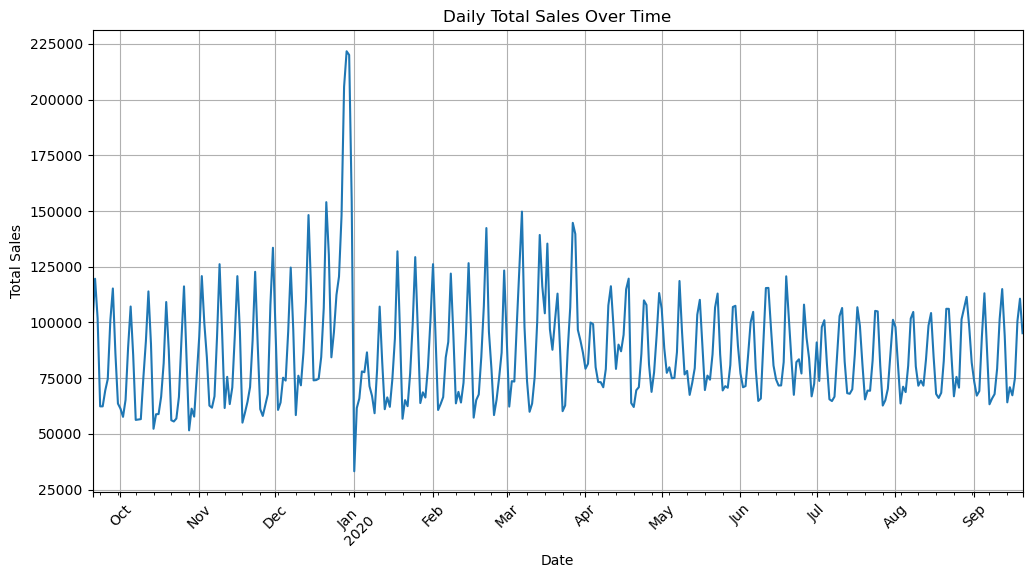

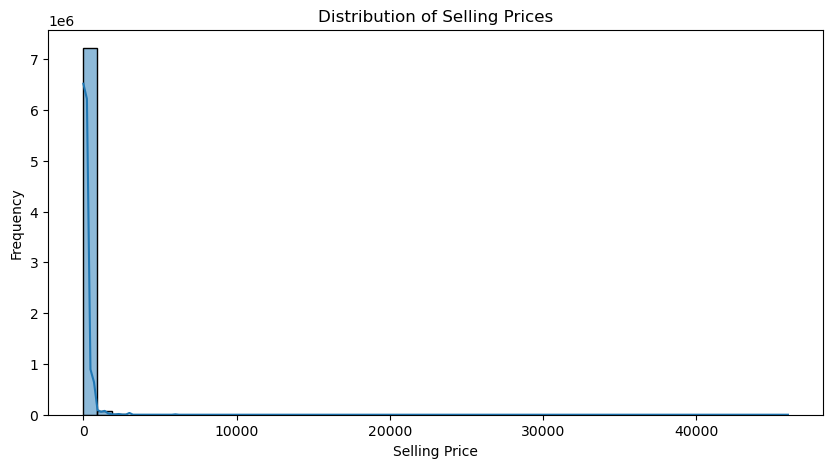

/var/folders/rm/lmyjz_vx0k36zcr90nqkhgyr0000gn/T/ipykernel_18293/1899213922.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Aligning labels properly


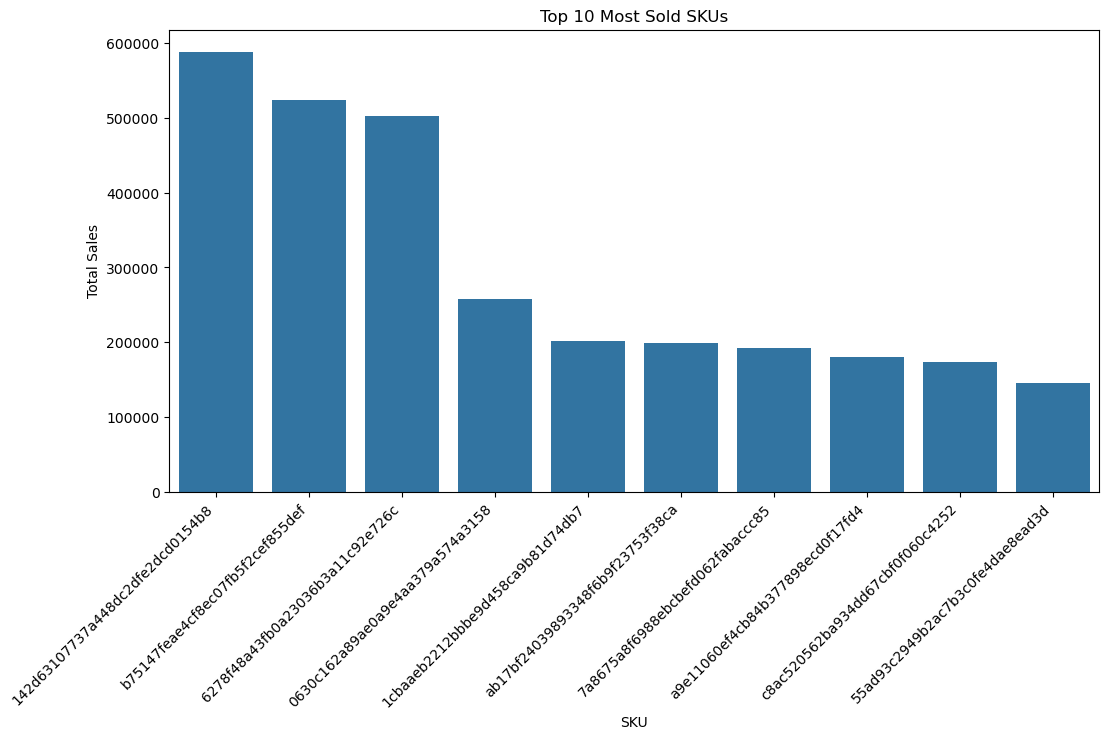

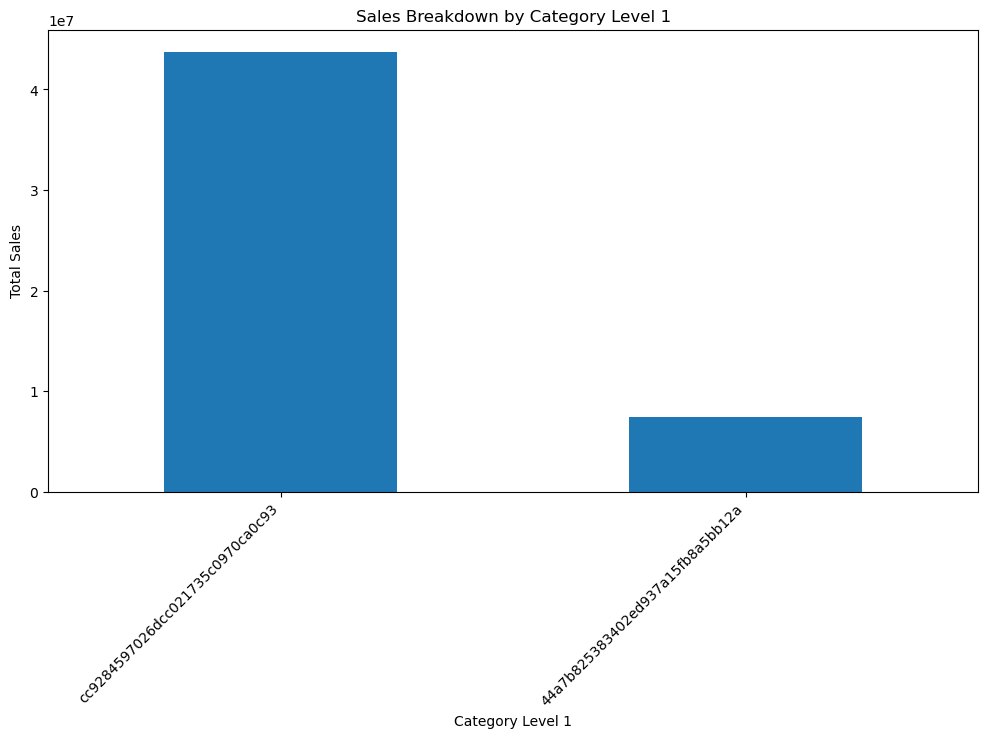

In [ ]:
# Ensure correct sorting in eda_summary
eda_summary = {
    "Total Records": len(sales_agg),
    "Total Unique SKUs": sales_agg["sku"].nunique(),
    "Total Unique Regions": sales_agg["region_name"].nunique(),
}

# Check for missing values
missing_values = sales_agg.isnull().sum().reset_index()
missing_values.columns = ["Column", "Missing Values"]
missing_values = missing_values[missing_values["Missing Values"] > 0]

# Sales Trend Over Time
plt.figure(figsize=(12, 6))
sales_agg.groupby('day')['num_sales'].sum().plot()
plt.title("Daily Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

# Sales Distribution by Selling Price
plt.figure(figsize=(10, 5))
sns.histplot(sales_agg["price_calc"], bins=50, kde=True)
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

# Top 10 Most Sold SKUs (With Proper Label Alignment)
top_skus = sales_agg.groupby('sku')['num_sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_skus, x="sku", y="num_sales", order=top_skus["sku"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  
plt.title("Top 10 Most Sold SKUs")
plt.xlabel("SKU")
plt.ylabel("Total Sales")
plt.show()

# Sales by Category Level (With Proper Label Alignment)
if "hierarchy_level1" in merged_data.columns:
    category_sales = merged_data.groupby("hierarchy_level1")["num_sales"].sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    ax = category_sales.plot(kind='bar')
    plt.title("Sales Breakdown by Category Level 1")
    plt.xlabel("Category Level 1")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45, ha='right')  
    plt.show()
else:
    
    # Merge sales_agg with df_gr to get hierarchy_level1 for each SKU
    sales_with_hierarchy = sales_agg.merge(df_gr[['sku', 'hierarchy_level1']], on='sku', how='left')

    # Now plot sales by hierarchy_level1
    category_sales = sales_with_hierarchy.groupby("hierarchy_level1")["num_sales"].sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    ax = category_sales.plot(kind='bar')
    plt.title("Sales Breakdown by Category Level 1 (from df_gr)")
    plt.xlabel("Category Level 1")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45, ha='right')
    plt.show()




#### Removing Outliers
As we can see in selling price there are some outliers so remove them and plot them

In [21]:
# Define function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


/var/folders/rm/lmyjz_vx0k36zcr90nqkhgyr0000gn/T/ipykernel_18293/1500883027.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.histplot(merged_data.groupby('check_id')['num_sales'].sum(), bins=50, kde=True)


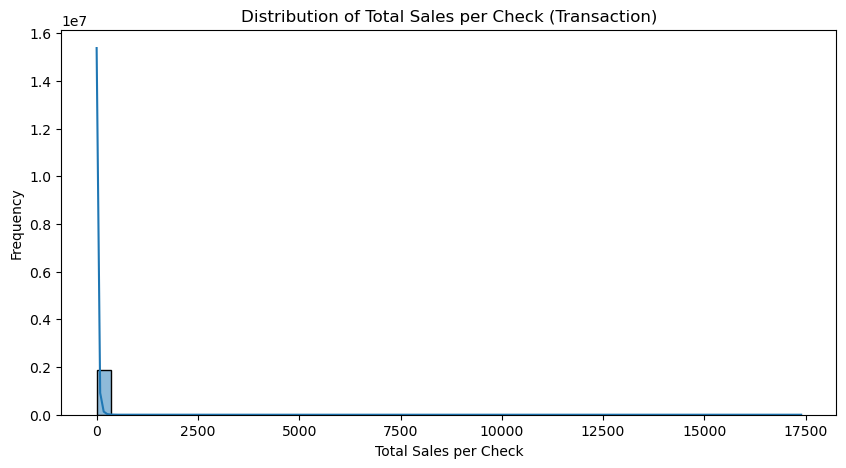

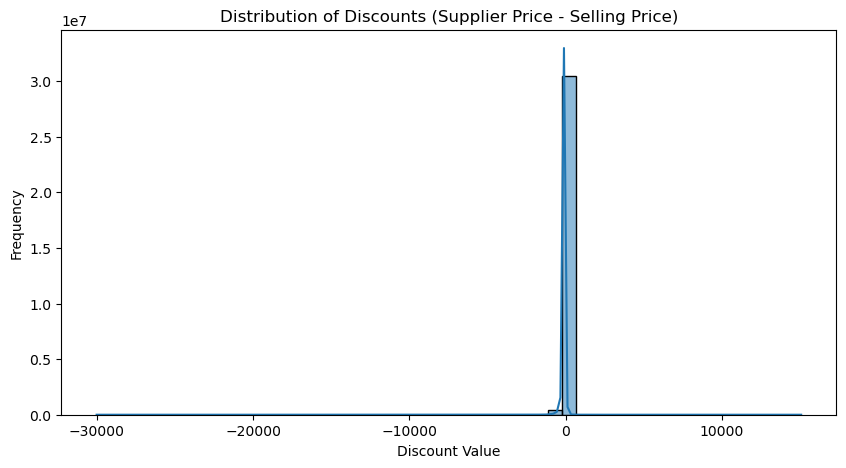

/var/folders/rm/lmyjz_vx0k36zcr90nqkhgyr0000gn/T/ipykernel_18293/1500883027.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promo_sales = merged_data.groupby("promo_id")["num_sales"].sum().reset_index()


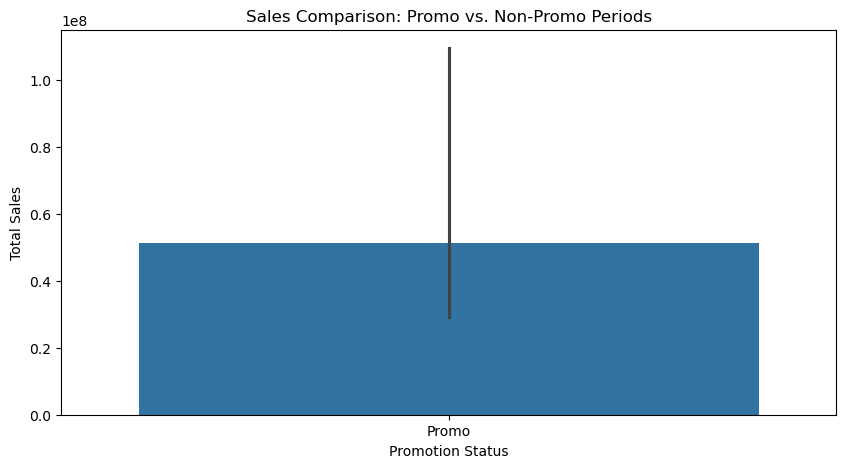

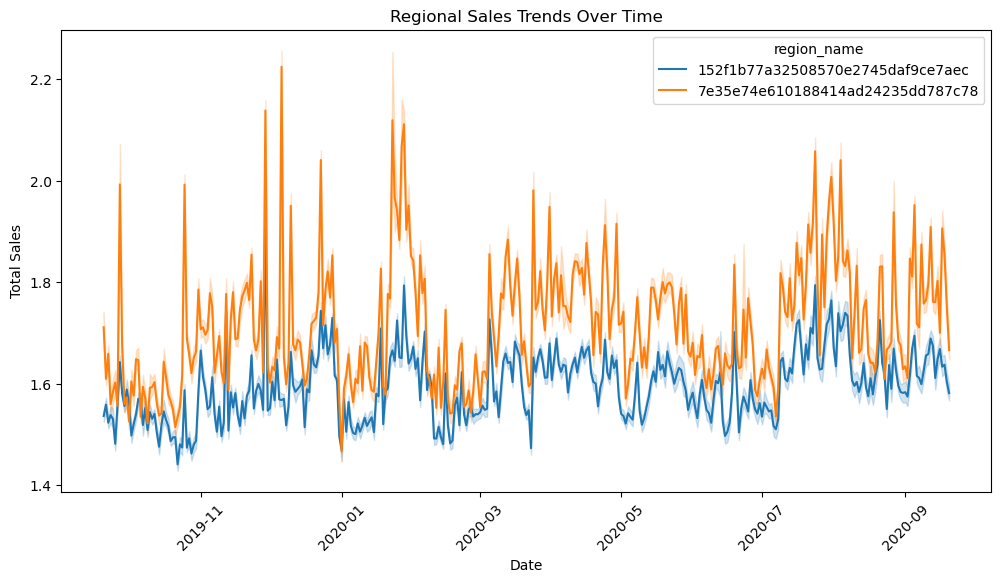

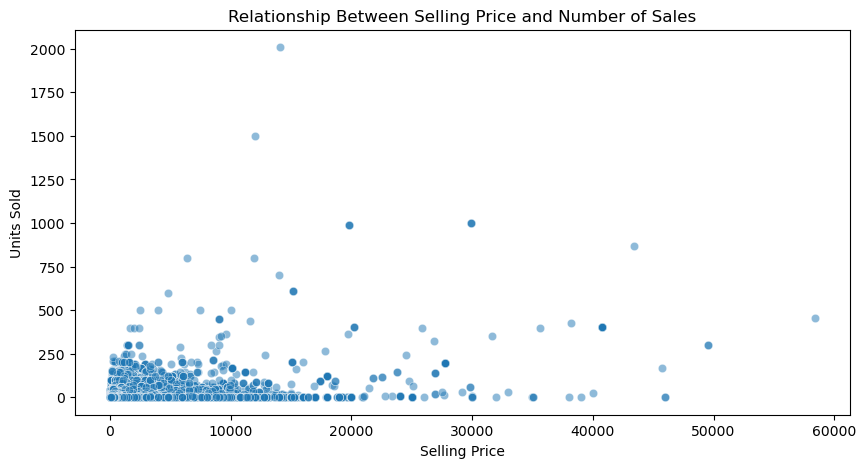

In [22]:

# Additional EDA insights beyond previous analysis

# 1. Distribution of Sales per Check (Transaction)
plt.figure(figsize=(10, 5))
sns.histplot(merged_data.groupby('check_id')['num_sales'].sum(), bins=50, kde=True)
plt.title("Distribution of Total Sales per Check (Transaction)")
plt.xlabel("Total Sales per Check")
plt.ylabel("Frequency")
plt.show()

# 2. Distribution of Discounts (Selling Price vs Supplier Price)
merged_data["discount"] = merged_data["supplier_price"] - merged_data["selling_price"]
plt.figure(figsize=(10, 5))
sns.histplot(merged_data["discount"], bins=50, kde=True)
plt.title("Distribution of Discounts (Supplier Price - Selling Price)")
plt.xlabel("Discount Value")
plt.ylabel("Frequency")
plt.show()

# 3. Promo vs. Non-Promo Sales Impact
promo_sales = merged_data.groupby("promo_id")["num_sales"].sum().reset_index()
promo_sales["promo_status"] = promo_sales["promo_id"].apply(lambda x: "Promo" if x != "NULL" else "No Promo")

plt.figure(figsize=(10, 5))
sns.barplot(x="promo_status", y="num_sales", data=promo_sales, estimator=sum)
plt.title("Sales Comparison: Promo vs. Non-Promo Periods")
plt.xlabel("Promotion Status")
plt.ylabel("Total Sales")
plt.show()

# 4. Regional Sales Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x="day", y="num_sales", hue="region_name")
plt.title("Regional Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# 5. Relationship Between Selling Price & Units Sold
plt.figure(figsize=(10, 5))
sns.scatterplot(x=merged_data["selling_price"], y=merged_data["num_sales"], alpha=0.5)
plt.title("Relationship Between Selling Price and Number of Sales")
plt.xlabel("Selling Price")
plt.ylabel("Units Sold")
plt.show()



As we can see there are some outliers remove them

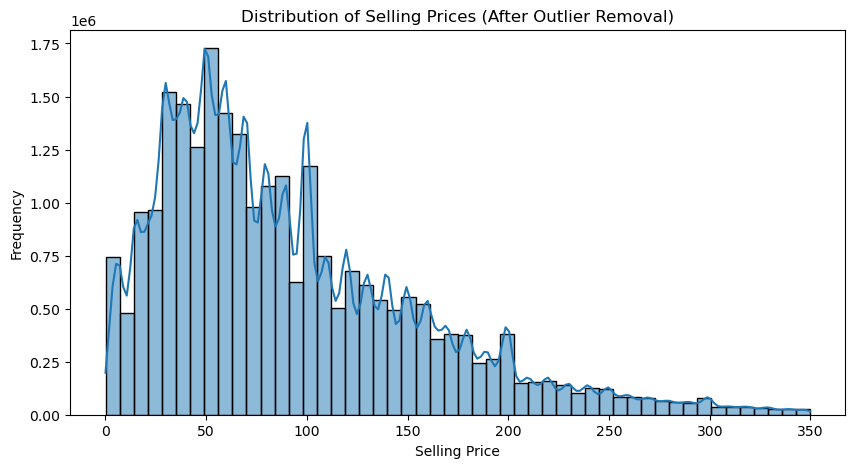

/var/folders/rm/lmyjz_vx0k36zcr90nqkhgyr0000gn/T/ipykernel_18293/1828677701.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.histplot(cleaned_data.groupby('check_id')['num_sales'].sum(), bins=50, kde=True)


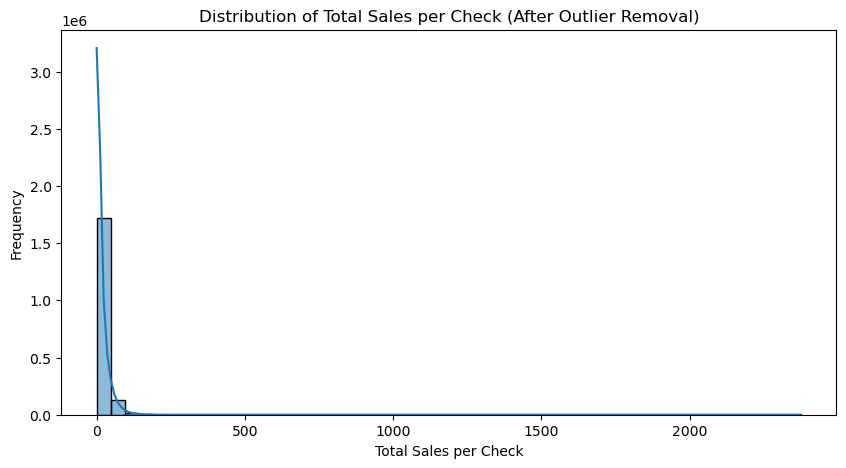

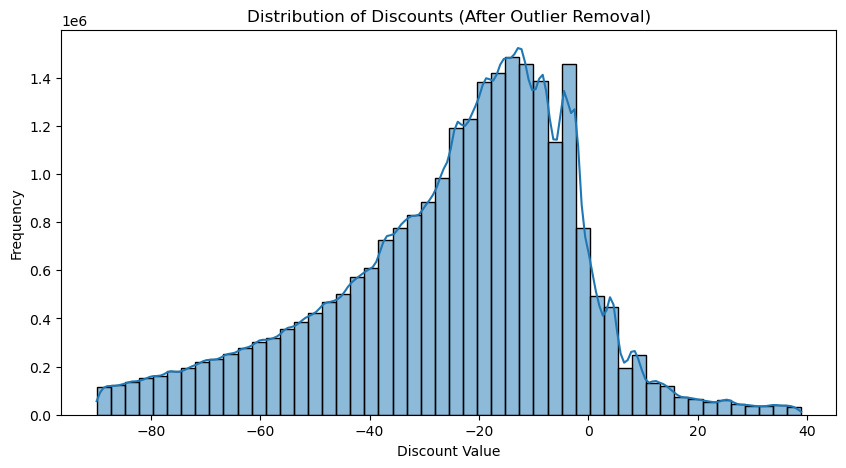

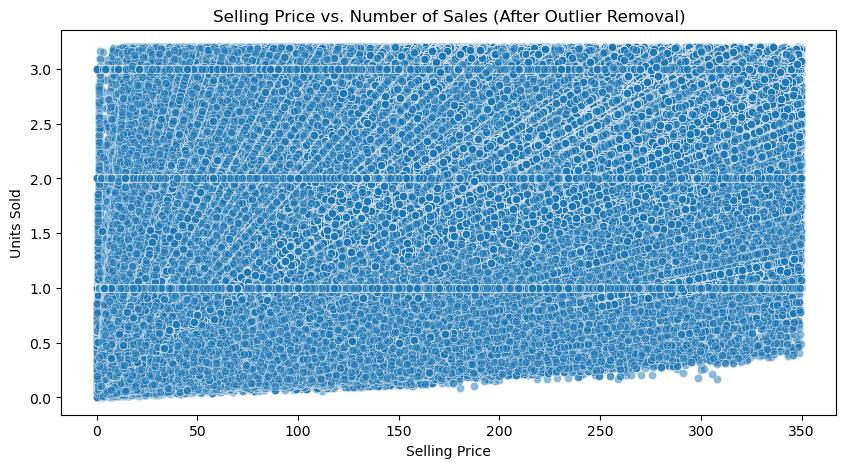

(30961959, 25183163, 5778796)

In [23]:
# Removing outliers from key columns
cleaned_data = remove_outliers_iqr(merged_data, "selling_price")
cleaned_data = remove_outliers_iqr(cleaned_data, "num_sales")
cleaned_data["discount"] = cleaned_data["supplier_price"] - cleaned_data["selling_price"]
cleaned_data = remove_outliers_iqr(cleaned_data, "discount")

# Plot cleaned Selling Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data["selling_price"], bins=50, kde=True)
plt.title("Distribution of Selling Prices (After Outlier Removal)")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

# Plot cleaned Sales per Check
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data.groupby('check_id')['num_sales'].sum(), bins=50, kde=True)
plt.title("Distribution of Total Sales per Check (After Outlier Removal)")
plt.xlabel("Total Sales per Check")
plt.ylabel("Frequency")
plt.show()

# Plot cleaned Discounts Distribution
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data["discount"], bins=50, kde=True)
plt.title("Distribution of Discounts (After Outlier Removal)")
plt.xlabel("Discount Value")
plt.ylabel("Frequency")
plt.show()

# Plot cleaned Selling Price vs. Sales Relationship
plt.figure(figsize=(10, 5))
sns.scatterplot(x=cleaned_data["selling_price"], y=cleaned_data["num_sales"], alpha=0.5)
plt.title("Selling Price vs. Number of Sales (After Outlier Removal)")
plt.xlabel("Selling Price")
plt.ylabel("Units Sold")
plt.show()

# Display number of removed outliers
original_size = len(merged_data)
filtered_size = len(cleaned_data)
outliers_removed = original_size - filtered_size

original_size, filtered_size, outliers_removed


#### Selecting SKU

In [24]:
import pandas as pd

# Load your saved sales_agg file
sales_agg = pd.read_pickle("/Users/sirishaneduri/Downloads/Lenta hack/sales_region_agg_fixed.pickle")
sales_agg["day"] = pd.to_datetime(sales_agg["day"])

# Separate promo and regular data
promo_data = sales_agg[sales_agg["start_date"].notna()].copy()
non_promo_data = sales_agg[sales_agg["start_date"].isna()].copy()

# Step 1: Pick only the most active SKU-region pairs
top_pairs = (
    sales_agg.groupby(["sku", "region_name"])["day"]
    .nunique()
    .reset_index(name="active_days")
    .sort_values(by="active_days", ascending=False)
    .head(500)
)

# Filter promo_data only to top pairs
promo_data = promo_data.merge(top_pairs, on=["sku", "region_name"], how="inner")

# Step 2: Loop and filter
results = []

for i, ((sku, region), group) in enumerate(promo_data.groupby(["sku", "region_name"])):
    full_data = sales_agg[(sales_agg["sku"] == sku) & (sales_agg["region_name"] == region)]

    promo_days = group["day"].nunique()
    non_promo_days = full_data[full_data["start_date"].isna()]["day"].nunique()

    if promo_days < 30 or non_promo_days < 30:
        continue

    promo_sales = group["num_sales"].median()
    baseline_sales = full_data[full_data["start_date"].isna()]["num_sales"].median()

    if baseline_sales < 2:
        continue

    uplift = (promo_sales - baseline_sales) / baseline_sales * 100

    # Post-promo spike filter
    last_promo_day = group["day"].max()
    post_period = full_data[
        (full_data["day"] > last_promo_day) &
        (full_data["day"] <= last_promo_day + pd.Timedelta(days=14))
    ]

    if not post_period.empty and post_period["num_sales"].mean() > promo_sales * 1.2:
        continue

    results.append({
        "sku": sku,
        "region_name": region,
        "baseline_sales": round(baseline_sales, 2),
        "promo_sales": round(promo_sales, 2),
        "uplift_%": round(uplift, 2),
        "promo_days": promo_days,
        "total_days": full_data["day"].nunique()
    })

filtered_skus = pd.DataFrame(results).sort_values(by="uplift_%", ascending=False)
filtered_skus.head(25)

,sku,region_name,baseline_sales,promo_sales,uplift_%,promo_days,total_days
2,119a9ea3a832472e1c163e5c1afba59e,7e35e74e610188414ad24235dd787c78,11.11,91.60,724.71,84,366
1,119a9ea3a832472e1c163e5c1afba59e,152f1b77a32508570e2745daf9ce7aec,15.75,127.13,707.17,84,367
0,0b689fd70e79d5010e397b4c453e8460,152f1b77a32508570e2745daf9ce7aec,23.00,176.00,665.22,42,367
15,7a8675a8f6988ebcbefd062fabaccc85,7e35e74e610188414ad24235dd787c78,74.33,460.51,519.51,161,367
39,ef7bf412117548cb80b3f3b33a12977d,7e35e74e610188414ad24235dd787c78,83.27,404.69,386.03,63,367
19,8f4b2b5d481140b01c5b20bbf493b2b9,152f1b77a32508570e2745daf9ce7aec,26.00,124.00,376.92,71,367
14,7a8675a8f6988ebcbefd062fabaccc85,152f1b77a32508570e2745daf9ce7aec,94.42,411.18,335.50,161,367
38,ef7bf412117548cb80b3f3b33a12977d,152f1b77a32508570e2745daf9ce7aec,99.63,426.46,328.02,63,367
20,8f4b2b5d481140b01c5b20bbf493b2b9,7e35e74e610188414ad24235dd787c78,28.00,119.00,325.00,71,367
21,911d7361089a37c2a6488a548b4f06a8,152f1b77a32508570e2745daf9ce7aec,26.12,92.40,253.72,91,367


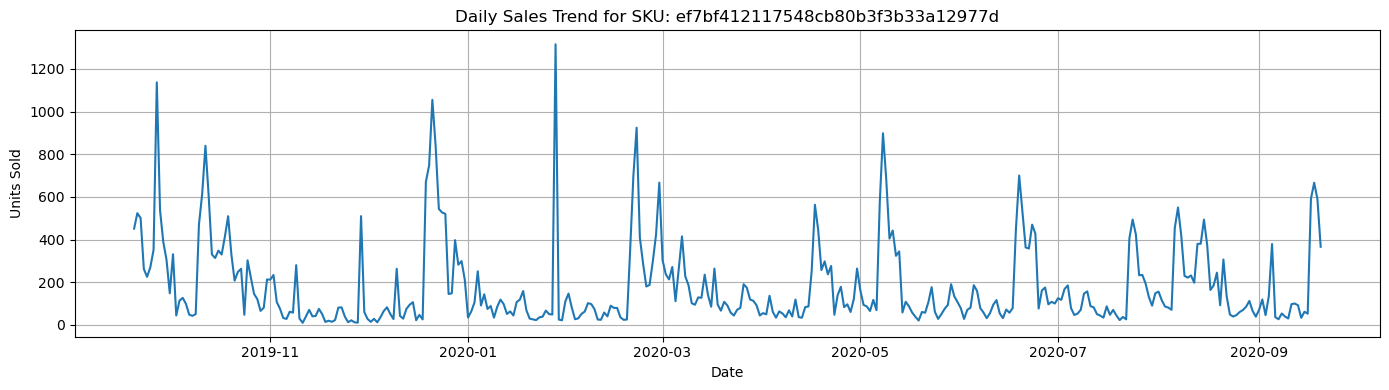

In [ ]:
import matplotlib.pyplot as plt

# Define the top 3 selected SKU–region pairs
top_skus = [
    {"sku": "ef7bf412117548cb80b3f3b33a12977d", "region": "7e35e74e610188414ad24235dd787c78"}
]

# Loop through each SKU-region combo
for sku_entry in top_skus:
    sku = sku_entry["sku"]
    region = sku_entry["region"]
    title = f"SKU: {sku[:6]}... | Region: {region[:6]}..."

    # Filter sales_agg for this SKU + region
    df_plot = sales_agg[
        (sales_agg["sku"] == sku) & 
        (sales_agg["region_name"] == region)
    ].copy()

    df_plot = df_plot.sort_values("day")
    df_plot["day"] = pd.to_datetime(df_plot["day"])

    # Plot
    plt.figure(figsize=(14, 4))
    plt.plot(df_plot["day"], df_plot["num_sales"], linestyle='-')
    plt.title(f"Daily Sales Trend for SKU: ef7bf412117548cb80b3f3b33a12977d")
    plt.xlabel("Date")
    plt.ylabel("Units Sold")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [26]:
best_sku = "ef7bf412117548cb80b3f3b33a12977d"

# pick region 
best_region = "7e35e74e610188414ad24235dd787c78"

# Filter the data
sku_df = sales_agg[
    (sales_agg["sku"] == best_sku) &
    (sales_agg["region_name"] == best_region)
].copy()

sku_df = sku_df.sort_values("day")
sku_df.head()

,day,sku,region_name,price_calc,num_sales,start_date,end_date
19158,2019-09-20,ef7bf412117548cb80b3f3b33a12977d,7e35e74e610188414ad24235dd787c78,135.0,451.440,NaN,NaN
42689,2019-09-21,ef7bf412117548cb80b3f3b33a12977d,7e35e74e610188414ad24235dd787c78,135.0,523.690,NaN,NaN
64592,2019-09-22,ef7bf412117548cb80b3f3b33a12977d,7e35e74e610188414ad24235dd787c78,135.0,501.192,NaN,NaN
81235,2019-09-23,ef7bf412117548cb80b3f3b33a12977d,7e35e74e610188414ad24235dd787c78,135.0,262.412,NaN,NaN
97893,2019-09-24,ef7bf412117548cb80b3f3b33a12977d,7e35e74e610188414ad24235dd787c78,135.0,225.540,NaN,NaN


In [ ]:
import pandas as pd

best_sku = "ef7bf412117548cb80b3f3b33a12977d"
best_region = "7e35e74e610188414ad24235dd787c78"

# Filter SKU data
sku_df = sales_agg[
    (sales_agg["sku"] == best_sku) &
    (sales_agg["region_name"] == best_region)
].copy()

sku_df["day"] = pd.to_datetime(sku_df["day"])
sku_df["start_date"] = pd.to_datetime(sku_df["start_date"])
sku_df["end_date"] = pd.to_datetime(sku_df["end_date"])
sku_df = sku_df.sort_values("day")

# Extract promo periods for this SKU
promo_periods = sku_df[sku_df["start_date"].notna()][["start_date", "end_date"]].drop_duplicates()

# Static average price from non-promo baseline
baseline_price_avg = sku_df[sku_df["start_date"].isna()]["price_calc"].mean()

summary_rows = []

for _, row in promo_periods.iterrows():
    start = row["start_date"]
    end = row["end_date"]
    duration = (end - start).days + 1

    if duration < 3 or duration > 60:
        continue

    # Pre-promo window (30 days before)
    before = sku_df[
        (sku_df["day"] >= (start - pd.Timedelta(days=30))) &
        (sku_df["day"] < start) &
        (sku_df["start_date"].isna())
    ]

    during = sku_df[(sku_df["day"] >= start) & (sku_df["day"] <= end)]

    if before.empty or during.empty:
        continue

    avg_before = before["num_sales"].mean()
    avg_during = during["num_sales"].mean()

    if avg_before < 5:
        continue  # Skip weak baselines

    uplift = round((avg_during - avg_before) / avg_before * 100, 2)

    promo_price = during["price_calc"].mean()
    avg_discount = 0
    if pd.notna(promo_price) and baseline_price_avg > 0:
        avg_discount = round((1 - promo_price / baseline_price_avg) * 100, 1)

    if avg_discount < 0 or avg_discount > 90:
        continue

    summary_rows.append({
        "Promo Period": f"{start.date()} to {end.date()}",
        "Duration (days)": duration,
        "Avg Discount (%)": avg_discount,
        "Avg Baseline Sales": round(avg_before, 1),
        "Avg Promo Sales": round(avg_during, 1),
        "Uplift (%)": uplift
    })

sku_summary_df = pd.DataFrame(summary_rows)
# Flag inflated uplifts
def flag_inflated_uplift(df, baseline_col='Avg Baseline Sales', uplift_col='Uplift (%)', threshold_baseline=30, threshold_uplift=300):
    df = df.copy()
    df['Inflated Uplift'] = (df[baseline_col] < threshold_baseline) & (df[uplift_col] > threshold_uplift)
    return df

sku_summary_df = flag_inflated_uplift(sku_summary_df)
sku_summary_df = sku_summary_df.sort_values(by="Uplift (%)", ascending=False)

sku_summary_df

,Promo Period,Duration (days),Avg Discount (%),Avg Baseline Sales,Avg Promo Sales,Uplift (%),Inflated Uplift
2,2019-12-19 to 2019-12-25,7,22.5,55.7,700.5,1156.63,False
6,2020-06-18 to 2020-06-24,7,21.9,83.4,471.3,465.06,False
5,2020-05-07 to 2020-05-13,7,22.9,93.4,524.3,461.55,False
3,2020-02-20 to 2020-03-04,14,19.9,97.4,389.4,299.59,False
4,2020-04-16 to 2020-04-22,7,19.6,85.9,333.1,287.99,False
7,2020-07-23 to 2020-07-29,7,16.1,89.6,302.4,237.57,False
0,2019-10-10 to 2019-10-16,7,19.3,298.0,503.1,68.82,False
1,2019-11-28 to 2019-12-04,7,1.0,71.2,95.2,33.68,False


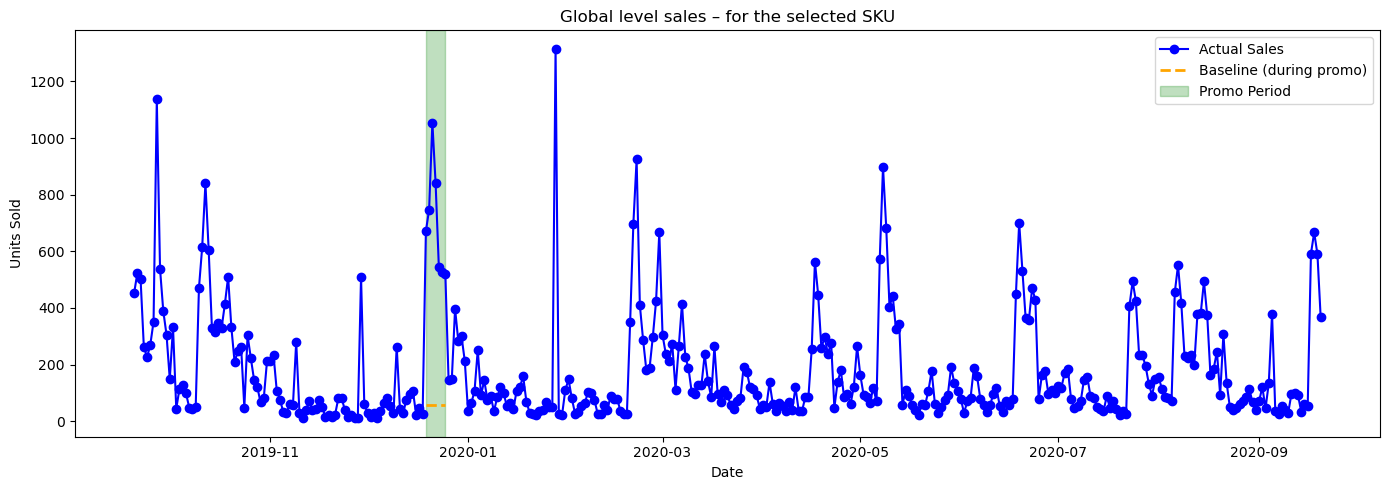

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Set SKU and region
selected_sku = "ef7bf412117548cb80b3f3b33a12977d"
selected_region = "7e35e74e610188414ad24235dd787c78"
promo_start = pd.to_datetime("2019-12-19")
promo_end = pd.to_datetime("2019-12-25")

# Filter for SKU and region
sku_df = sales_agg[
    (sales_agg["sku"] == selected_sku) &
    (sales_agg["region_name"] == selected_region)
].copy()

sku_df["day"] = pd.to_datetime(sku_df["day"])
sku_df = sku_df.sort_values("day")

# Calculate baseline from 30 days before the promo
baseline_window = sku_df[
    (sku_df["day"] >= (promo_start - pd.Timedelta(days=30))) &
    (sku_df["day"] < promo_start) &
    (sku_df["start_date"].isna())
]
baseline_avg = baseline_window["num_sales"].mean()

# Plot: Global sales with baseline shown only during promo
plt.figure(figsize=(14, 5))
plt.plot(sku_df["day"], sku_df["num_sales"], label="Actual Sales", color="blue", linestyle='-', marker='o')

# Draw horizontal line ONLY during promo days
plt.hlines(y=baseline_avg, xmin=promo_start, xmax=promo_end, color="orange", linestyle="--", linewidth=2, label="Baseline (during promo)")

# Highlight promo period
plt.axvspan(promo_start, promo_end, color="green", alpha=0.25, label="Promo Period")

plt.title("Global level sales – for the selected SKU")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.tight_layout()
plt.show()

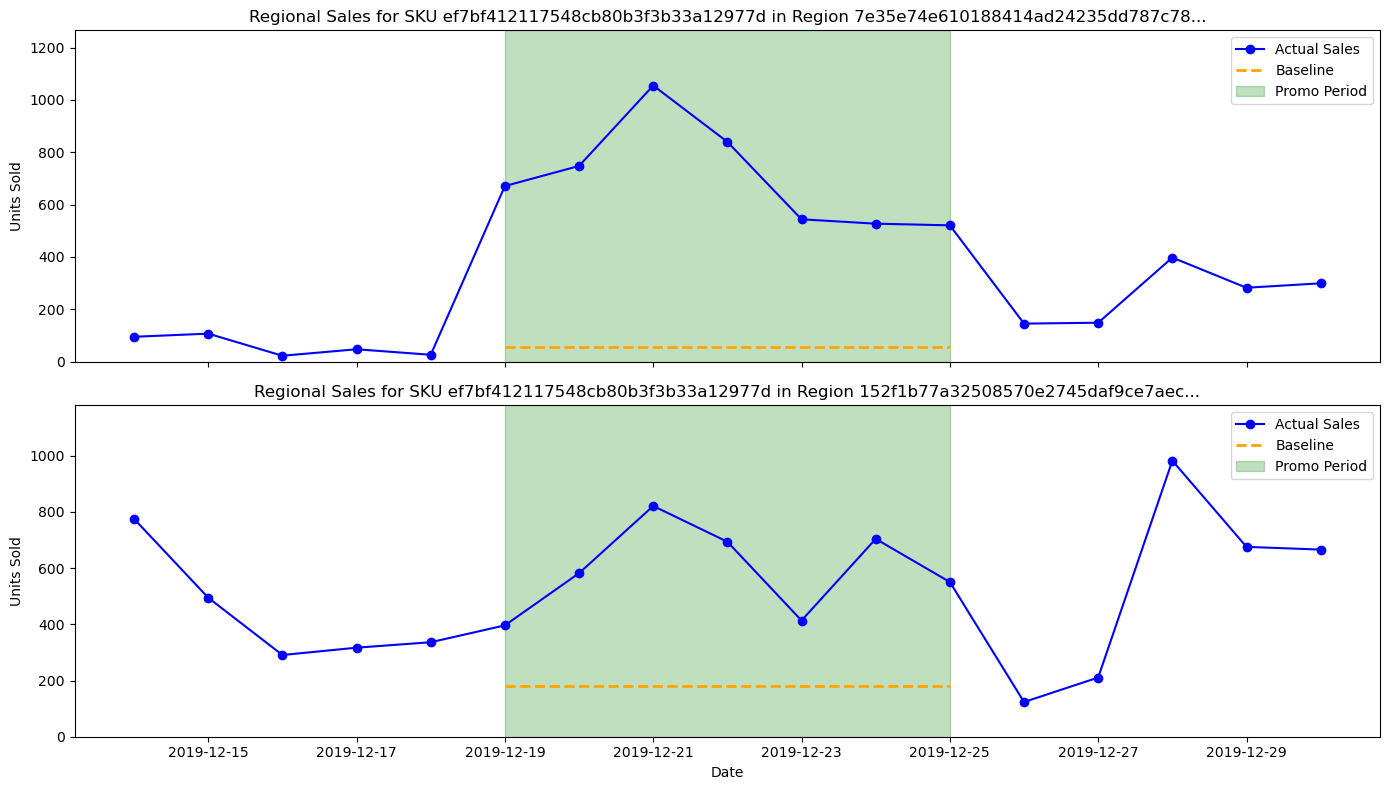

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Inputs
sku_id = "ef7bf412117548cb80b3f3b33a12977d"
region_1 = "7e35e74e610188414ad24235dd787c78"
region_2 = "152f1b77a32508570e2745daf9ce7aec"
promo_start = pd.to_datetime("2019-12-19")
promo_end = pd.to_datetime("2019-12-25")

# Prepare plot
fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

for ax, region in zip(axs, [region_1, region_2]):
    # Filter data
    sku_df = sales_agg[
        (sales_agg["sku"] == sku_id) &
        (sales_agg["region_name"] == region)
    ].copy()

    sku_df["day"] = pd.to_datetime(sku_df["day"])
    sku_df = sku_df.sort_values("day")

    # Calculate baseline from 30-day pre-promo period
    baseline_window = sku_df[
        (sku_df["day"] >= (promo_start - pd.Timedelta(days=30))) &
        (sku_df["day"] < promo_start) &
        (sku_df["start_date"].isna())
    ]
    baseline_avg = baseline_window["num_sales"].mean()

    # Zoom in on the plot
    zoom_start = promo_start - pd.Timedelta(days=5)
    zoom_end = promo_end + pd.Timedelta(days=5)
    plot_df = sku_df[(sku_df["day"] >= zoom_start) & (sku_df["day"] <= zoom_end)]

    # Plot sales
    ax.plot(plot_df["day"], plot_df["num_sales"], label="Actual Sales", color="blue", linestyle='-', marker='o')

    # Plot flat baseline only during promo
    ax.hlines(y=baseline_avg, xmin=promo_start, xmax=promo_end, color="orange", linestyle="--", linewidth=2, label="Baseline")

    # Highlight promo period
    ax.axvspan(promo_start, promo_end, color="green", alpha=0.25, label="Promo Period")

    # Styling
    ax.set_title(f"Regional Sales for SKU ef7bf412117548cb80b3f3b33a12977d in Region {region[:32]}...")
    ax.set_ylabel("Units Sold")
    ax.set_ylim(bottom=0, top=max(plot_df["num_sales"].max(), baseline_avg) * 1.2)
    
    ax.legend()

# Shared X label
plt.xlabel("Date")
plt.tight_layout()
plt.show()

Promo Period: 2019-09-27 to 2019-10-11
Baseline Period: 2019-08-28 to 2019-09-26
Average Promo Sales: 297.26
Average Baseline Sales: 369.39
Promotional Uplift: -19.53 %


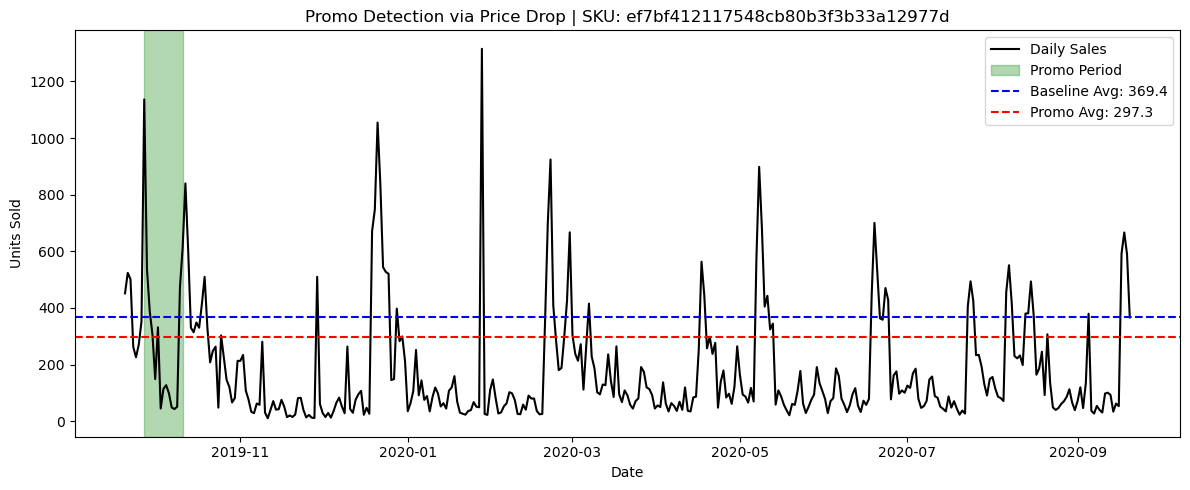

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure dates are in datetime format
sales_agg["day"] = pd.to_datetime(sales_agg["day"])

# Select SKU and region
sku_id = "ef7bf412117548cb80b3f3b33a12977d"
region_id = "7e35e74e610188414ad24235dd787c78"

# Filter SKU + region
df = sales_agg[(sales_agg["sku"] == sku_id) & (sales_agg["region_name"] == region_id)].copy()
df = df.sort_values("day")

# Detect price drop: simple first-order difference
df["price_change"] = df["price_calc"].diff()
price_drop = df[df["price_change"] < -0.1]  # Threshold for drop, tune as needed

# Select first strong drop
first_drop_day = price_drop["day"].iloc[0]

# Define periods
promo_start = first_drop_day
promo_end = promo_start + pd.Timedelta(days=14)

baseline_start = promo_start - pd.Timedelta(days=30)
baseline_end = promo_start - pd.Timedelta(days=1)

# Calculate metrics
promo_df = df[(df["day"] >= promo_start) & (df["day"] <= promo_end)]
baseline_df = df[(df["day"] >= baseline_start) & (df["day"] <= baseline_end)]

avg_promo_sales = promo_df["num_sales"].mean()
avg_baseline_sales = baseline_df["num_sales"].mean()
uplift = round((avg_promo_sales - avg_baseline_sales) / avg_baseline_sales * 100, 2)

# Print result
print("Promo Period:", promo_start.date(), "to", promo_end.date())
print("Baseline Period:", baseline_start.date(), "to", baseline_end.date())
print("Average Promo Sales:", round(avg_promo_sales, 2))
print("Average Baseline Sales:", round(avg_baseline_sales, 2))
print("Promotional Uplift:", uplift, "%")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df["day"], df["num_sales"], label="Daily Sales", color="black")

plt.axvspan(promo_start, promo_end, color="green", alpha=0.3, label="Promo Period")

plt.axhline(avg_baseline_sales, color="blue", linestyle="--", label=f"Baseline Avg: {avg_baseline_sales:.1f}")
plt.axhline(avg_promo_sales, color="red", linestyle="--", label=f"Promo Avg: {avg_promo_sales:.1f}")

plt.title(f"Promo Detection via Price Drop | SKU: {sku_id}")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.tight_layout()
plt.show()

In [33]:

promo_summary = []

for (sku, region), group in sales_agg.groupby(["sku", "region_name"]):
    promo_periods = group[group["start_date"].notna()][["start_date", "end_date"]].drop_duplicates()

    if promo_periods.empty:
        continue

    for _, row in promo_periods.iterrows():
        start = pd.to_datetime(row["start_date"])
        end = pd.to_datetime(row["end_date"])

        pre_start = start - pd.Timedelta(days=(end - start).days + 1)
        pre_end = start - pd.Timedelta(days=1)

        baseline = group[(group["day"] >= pre_start) & (group["day"] <= pre_end) & (group["start_date"].isna())]
        promo = group[(group["day"] >= start) & (group["day"] <= end)]

        if len(baseline) < 5 or len(promo) < 5:
            continue

        uplift = (promo["num_sales"].mean() - baseline["num_sales"].mean()) / baseline["num_sales"].mean() * 100

        promo_summary.append({
            "SKU": sku,
            "Region": region,
            "Uplift (%)": round(uplift, 2)
        })

summary_df_all = pd.DataFrame(promo_summary)

/var/folders/rm/lmyjz_vx0k36zcr90nqkhgyr0000gn/T/ipykernel_18293/930031500.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_uplift.sort_values(by="Uplift (%)", ascending=False),


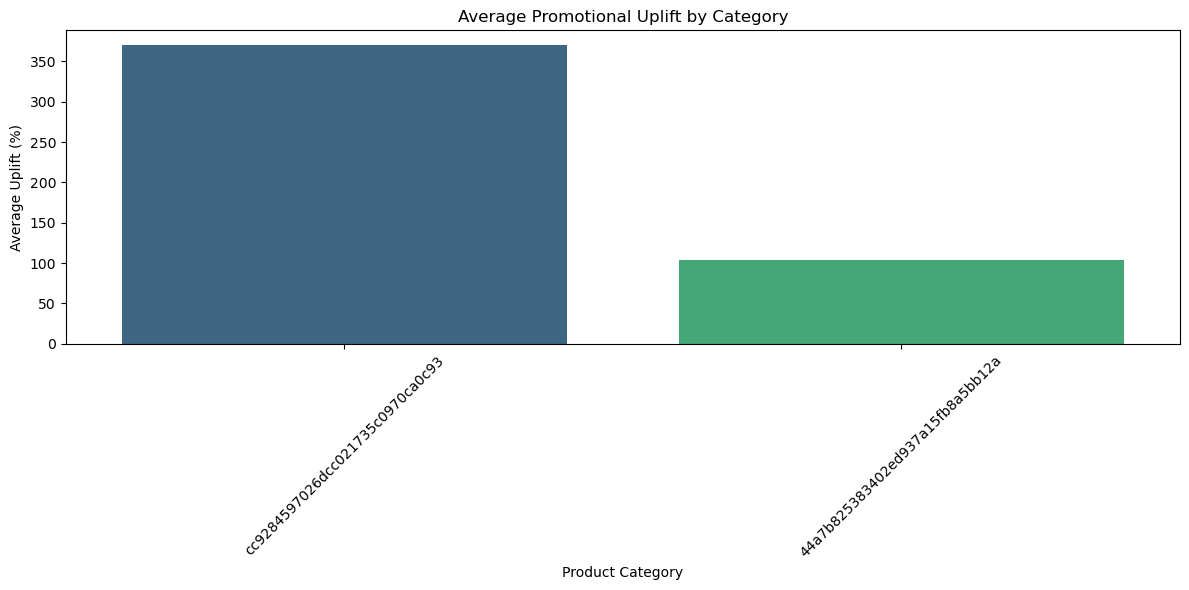

In [34]:
# Prepare SKU-category mapping
sku_category_map = df_gr.drop_duplicates(subset=["sku"])[["sku", "hierarchy_level1"]]

# Merge with summary table
summary_with_category = summary_df_all.merge(sku_category_map, left_on="SKU", right_on="sku", how="left")

# Group and calculate average uplift
category_uplift = summary_with_category.groupby("hierarchy_level1")["Uplift (%)"].mean().reset_index()

# Plot bar graph
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=category_uplift.sort_values(by="Uplift (%)", ascending=False),
            x="hierarchy_level1", y="Uplift (%)", palette="viridis")

plt.title("Average Promotional Uplift by Category")
plt.xlabel("Product Category")
plt.ylabel("Average Uplift (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
import pandas as pd

# Selected SKU and Region
target_sku = "ef7bf412117548cb80b3f3b33a12977d"
region = "7e35e74e610188414ad24235dd787c78"
promo_start = pd.to_datetime("2019-12-19")
promo_end = pd.to_datetime("2019-12-25")
promo_length = (promo_end - promo_start).days + 1

# Baseline period: same duration before promo
baseline_start = promo_start - pd.Timedelta(days=promo_length)
baseline_end = promo_start - pd.Timedelta(days=1)

# Filter other SKUs in region
baseline_df = sales_agg[
    (sales_agg["region_name"] == region) &
    (sales_agg["sku"] != target_sku) &
    (sales_agg["day"] >= baseline_start) & (sales_agg["day"] <= baseline_end)
]

during_df = sales_agg[
    (sales_agg["region_name"] == region) &
    (sales_agg["sku"] != target_sku) &
    (sales_agg["day"] >= promo_start) & (sales_agg["day"] <= promo_end)
]

# Calculate average daily sales (other SKUs)
baseline_avg = baseline_df["num_sales"].sum() / promo_length
promo_avg = during_df["num_sales"].sum() / promo_length

# Side Effect % (positive = halo, negative = cannibalization)
side_effect = promo_avg - baseline_avg
side_effect_pct = round((side_effect / baseline_avg) * 100, 2)

# Summary
print("Baseline Avg Daily Sales (Other SKUs):", round(baseline_avg, 2))
print("Promo Avg Daily Sales (Other SKUs):", round(promo_avg, 2))
print("Change in Avg Sales (Other SKUs):", round(side_effect, 2))
print("Side Effect %:", f"{side_effect_pct:+.2f}%")

# Interpretation
if side_effect_pct < -5:
    print("Interpretation: Likely cannibalization – other SKUs saw a drop during the promo.")
elif side_effect_pct > 5:
    print("Interpretation: Possible halo effect – other SKUs benefited during the promo.")
else:
    print("Interpretation: Minimal impact on other SKUs – no strong halo or cannibalization detected.")

Baseline Avg Daily Sales (Other SKUs): 43716.31
Promo Avg Daily Sales (Other SKUs): 48915.16
Change in Avg Sales (Other SKUs): 5198.85
Side Effect %: +11.89%
Interpretation: Possible halo effect – other SKUs benefited during the promo.


#### Promo side effects

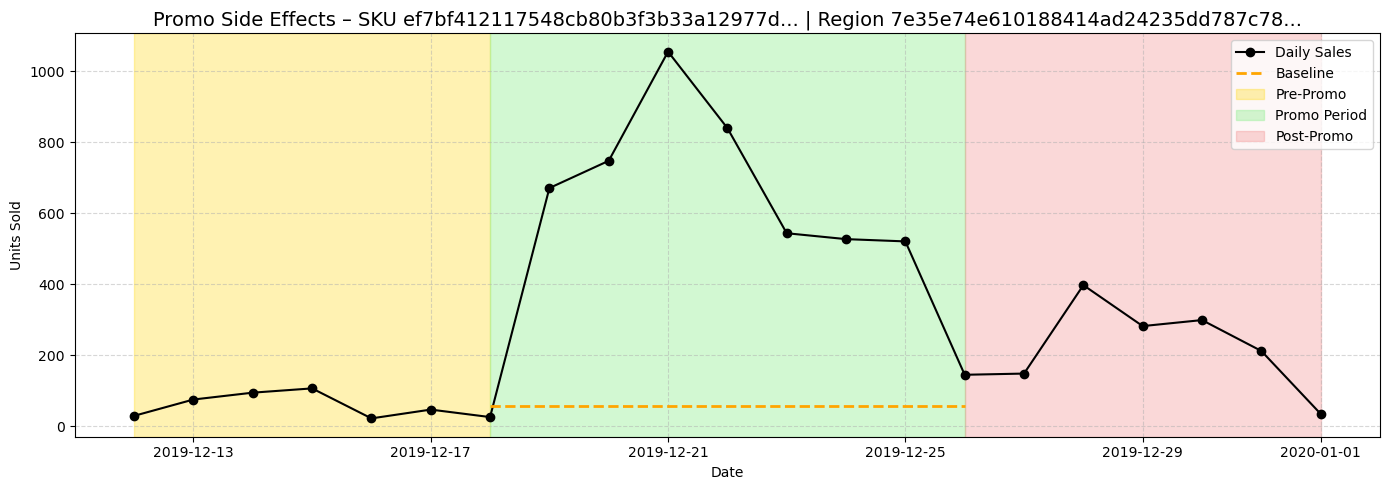

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Set SKU and region
sku_id = "ef7bf412117548cb80b3f3b33a12977d"
region_id = "7e35e74e610188414ad24235dd787c78"
promo_start = pd.to_datetime("2019-12-19")
promo_end = pd.to_datetime("2019-12-25")
duration = (promo_end - promo_start).days + 1
gap = pd.Timedelta(days=1)  # ➤ Extend line 1 day before and after

# Filter & prepare data 
sku_df = sales_agg[
    (sales_agg["sku"] == sku_id) & 
    (sales_agg["region_name"] == region_id)
].copy()
sku_df["day"] = pd.to_datetime(sku_df["day"])
sku_df = sku_df.sort_values("day")

# Periods for pre-promo, promo, and post-promo
pre_start = promo_start - pd.Timedelta(days=duration)
pre_end = promo_start - pd.Timedelta(days=1)
post_start = promo_end + pd.Timedelta(days=1)
post_end = promo_end + pd.Timedelta(days=duration)

# Fill missing days for full range 
full_range = pd.date_range(pre_start, post_end, freq='D')
sku_df = sku_df.set_index("day").reindex(full_range).rename_axis("day").reset_index()
sku_df["num_sales"] = sku_df["num_sales"].fillna(0)

# Calculate baseline 
baseline_avg = sku_df[(sku_df["day"] >= pre_start) & (sku_df["day"] <= pre_end)]["num_sales"].sum() / duration

# Plot 
plt.figure(figsize=(14, 5))
plt.plot(sku_df["day"], sku_df["num_sales"], label="Daily Sales", color="black", marker='o')

# Extended baseline line
plt.hlines(
    y=baseline_avg, 
    xmin=promo_start - gap, 
    xmax=promo_end + gap, 
    color="orange", 
    linestyle="--", 
    linewidth=2, 
    label=f"Baseline"
)

# Adjusted shaded spans
plt.axvspan(pre_start, promo_start - gap, color="gold", alpha=0.3, label="Pre-Promo")
plt.axvspan(promo_start - gap, promo_end + gap, color="lightgreen", alpha=0.4, label="Promo Period")
plt.axvspan(promo_end + gap, post_end, color="lightcoral", alpha=0.3, label="Post-Promo")

# Formatting
plt.title(f"Promo Side Effects – SKU {sku_id[:32]}... | Region {region_id[:32]}...", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

#### Basket-level Analysis

In [37]:
# Step 1: Copy check-level data
basket_data = df_checks.copy()

# Step 2: Ensure datetime format
basket_data["day"] = pd.to_datetime(basket_data["day"])

# Step 3: Compute item total
basket_data["item_total"] = basket_data["num_sales"] * basket_data["selling_price"]

# Step 4: Mark promo vs. regular more robustly
# Define known non-promo ID if applicable
non_promo_id = "7215ee9c7d9dc229d2921a40e899ec5f"

# Create is_promo flag
basket_data["is_promo"] = basket_data["promo_id"].notna() & (basket_data["promo_id"] != non_promo_id)

# Step 5: Group by check_id to create basket summary
basket_summary = basket_data.groupby("check_id").agg({
    "item_total": "sum",
    "is_promo": lambda x: "promo" if x.any() else "regular"
}).reset_index().rename(columns={
    "item_total": "basket_value",
    "is_promo": "basket_type"
})

# check the count of each type
print(basket_summary["basket_type"].value_counts())

/var/folders/rm/lmyjz_vx0k36zcr90nqkhgyr0000gn/T/ipykernel_18293/2053223620.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  basket_summary = basket_data.groupby("check_id").agg({


basket_type
promo      1646429
regular     220119
Name: count, dtype: int64


In [38]:
basket_summary

,check_id,basket_value,basket_type
0,00000e6292b4689441ca10bebd725507,8607.488281,promo
1,000016a65d75f45eff4e344dfc2b891d,1176.749878,promo
2,000024e77a2dca85fff1a06553bfc87b,2199.699951,promo
3,000029f377fd6dda00c82cdabce8f02e,182.000000,regular
4,00003b7f44620b2fd7bc9c13dc877d48,1936.839966,promo
...,...,...,...
1866543,ffffd15a2c986a0f4114f014f0a88333,1297.700073,regular
1866544,ffffd613a2d7bcaf7e6eac942094fc92,119.000000,promo
1866545,ffffe0f8e219ca52da181b915098e622,713.856018,promo
1866546,ffffe5023b7006d8aa438dd906415dd6,257.000000,promo


/var/folders/rm/lmyjz_vx0k36zcr90nqkhgyr0000gn/T/ipykernel_18293/787333785.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_basket_value, x="basket_type", y="basket_value", palette="pastel")


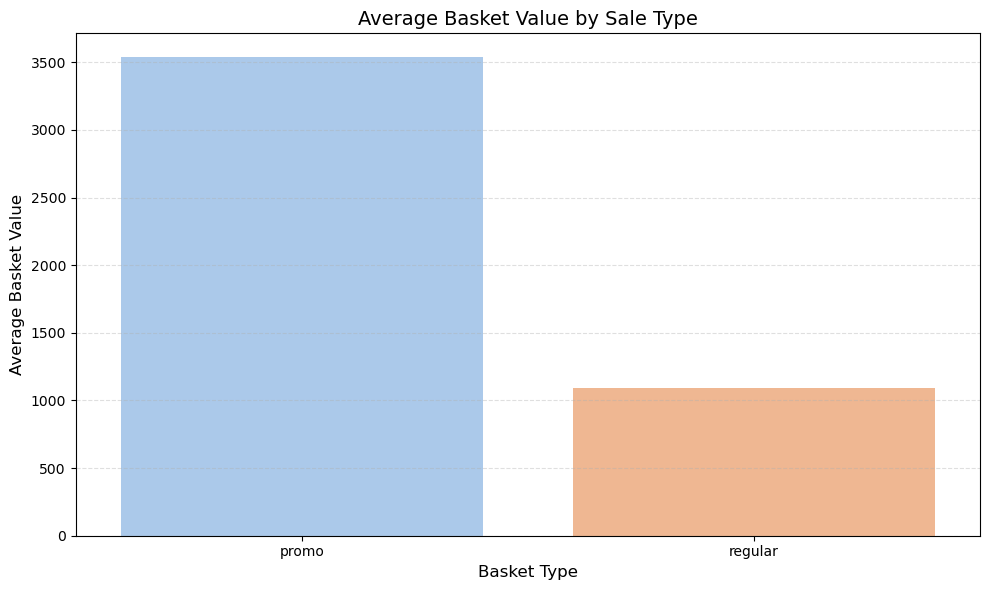

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by basket type and compute the average basket value
avg_basket_value = basket_summary.groupby("basket_type")["basket_value"].mean().reset_index()

# Step 2: Sort if needed 
avg_basket_value = avg_basket_value.sort_values(by="basket_value", ascending=False)

# Step 3: Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_basket_value, x="basket_type", y="basket_value", palette="pastel")
plt.title("Average Basket Value by Sale Type", fontsize=14)
plt.xlabel("Basket Type", fontsize=12)
plt.ylabel("Average Basket Value", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

#### Other SKUs - Calculate complementary effects

In [42]:
calculate_complementary_effects_df = pd.read_csv('calculate_complementary_effects_df.csv')

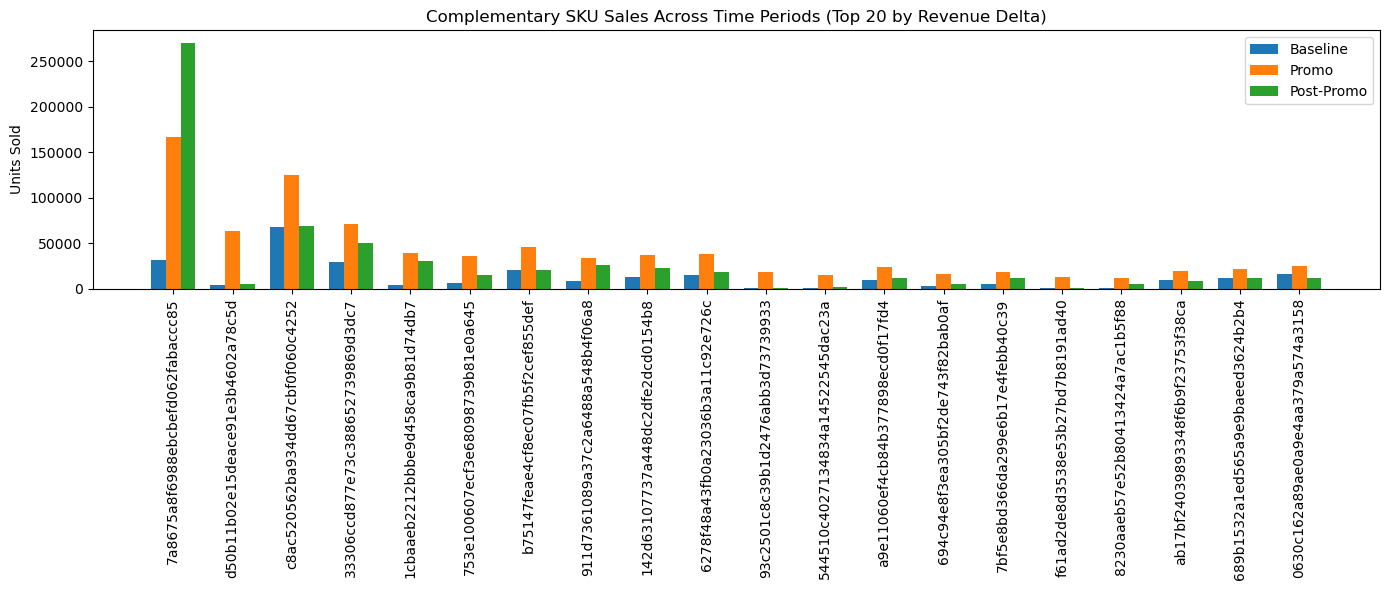

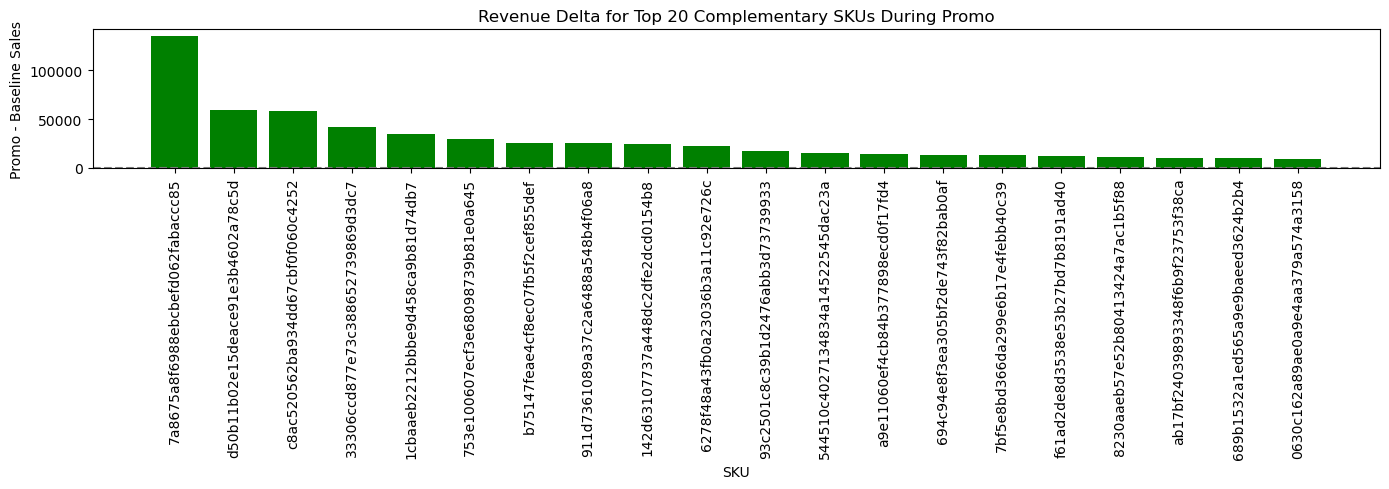

In [43]:
# Re-import essential libraries after kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulated complementary_df for visual demonstration
sample_complementary_df = calculate_complementary_effects_df

# Assume sample_complementary_df is already available and contains necessary fields

# Sort by Revenue Delta and select top 20 for better clarity
top_complementary_df = sample_complementary_df.sort_values(by='Revenue Delta', ascending=False).head(20).reset_index(drop=True)
x = np.arange(len(top_complementary_df))

# Improved Plot 1: Bar chart with clearer x-axis
fig, ax = plt.subplots(figsize=(14, 6))

bar1 = ax.bar(x - 0.25, top_complementary_df['Baseline Sales'], width=0.25, label='Baseline')
bar2 = ax.bar(x, top_complementary_df['Promo Sales'], width=0.25, label='Promo')
bar3 = ax.bar(x + 0.25, top_complementary_df['Post-Promo Sales'], width=0.25, label='Post-Promo')

ax.set_xticks(x)
ax.set_xticklabels(top_complementary_df['SKU'], rotation=90)
ax.set_ylabel("Units Sold")
ax.set_title("Complementary SKU Sales Across Time Periods (Top 20 by Revenue Delta)")
ax.legend()
plt.tight_layout()
plt.show()

# Improved Plot 2: Revenue Delta with color coding
plt.figure(figsize=(14, 5))
colors = ['green' if x > 0 else 'red' for x in top_complementary_df['Revenue Delta']]
plt.bar(top_complementary_df['SKU'], top_complementary_df['Revenue Delta'], color=colors)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Revenue Delta for Top 20 Complementary SKUs During Promo")
plt.ylabel("Promo - Baseline Sales")
plt.xlabel("SKU")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Additional Traffic Calculation

In [47]:
# Reuse your selected SKU and promo dates
chosen_sku = "059722185511d43203f7e298f03c9c07"  # select a random SKU for demonstration
promo_start = pd.to_datetime("2019-10-16")
promo_end = pd.to_datetime("2019-11-15")

# Choose a region (pick one)
chosen_region = '152f1b77a32508570e2745daf9ce7aec'  # region ID from the data

# Filter dataset for chosen region
filtered_data = merged_data[
    (merged_data['region_name'] == chosen_region) &
    (merged_data['day'].between(promo_start - pd.Timedelta(days=60), promo_end + pd.Timedelta(days=60)))
].copy()

# Ensure datetime format
filtered_data['day'] = pd.to_datetime(filtered_data['day'])

# Define periods
before_start = promo_start - pd.Timedelta(days=30)
before_end = promo_start - pd.Timedelta(days=1)

# 1. promo_period_all clients (any SKU during promo)
promo_period_all_clients = filtered_data[
    (filtered_data['day'] >= promo_start) & (filtered_data['day'] <= promo_end)
]['client_id'].unique()

# 2. promo_period_sku clients (our SKU during promo)
promo_period_sku_clients = filtered_data[
    (filtered_data['day'] >= promo_start) & (filtered_data['day'] <= promo_end) &
    (filtered_data['sku'] == chosen_sku)
]['client_id'].unique()

# 3. before_promo_all clients (any SKU one month before promo)
before_promo_all_clients = filtered_data[
    (filtered_data['day'] >= before_start) & (filtered_data['day'] <= before_end)
]['client_id'].unique()

# 4. before_promo_sku clients (our SKU one month before promo)
before_promo_sku_clients = filtered_data[
    (filtered_data['day'] >= before_start) & (filtered_data['day'] <= before_end) &
    (filtered_data['sku'] == chosen_sku)
]['client_id'].unique()

# Quick Summary:
print("🔵 Number of unique customers - Promo period (ALL SKUs):", len(promo_period_all_clients))
print("🟢 Number of unique customers - Promo period (CHOSEN SKU):", len(promo_period_sku_clients))
print("🟠 Number of unique customers - Before promo (ALL SKUs):", len(before_promo_all_clients))
print("🔴 Number of unique customers - Before promo (CHOSEN SKU):", len(before_promo_sku_clients))


🔵 Number of unique customers - Promo period (ALL SKUs): 21756
🟢 Number of unique customers - Promo period (CHOSEN SKU): 105
🟠 Number of unique customers - Before promo (ALL SKUs): 20174
🔴 Number of unique customers - Before promo (CHOSEN SKU): 83


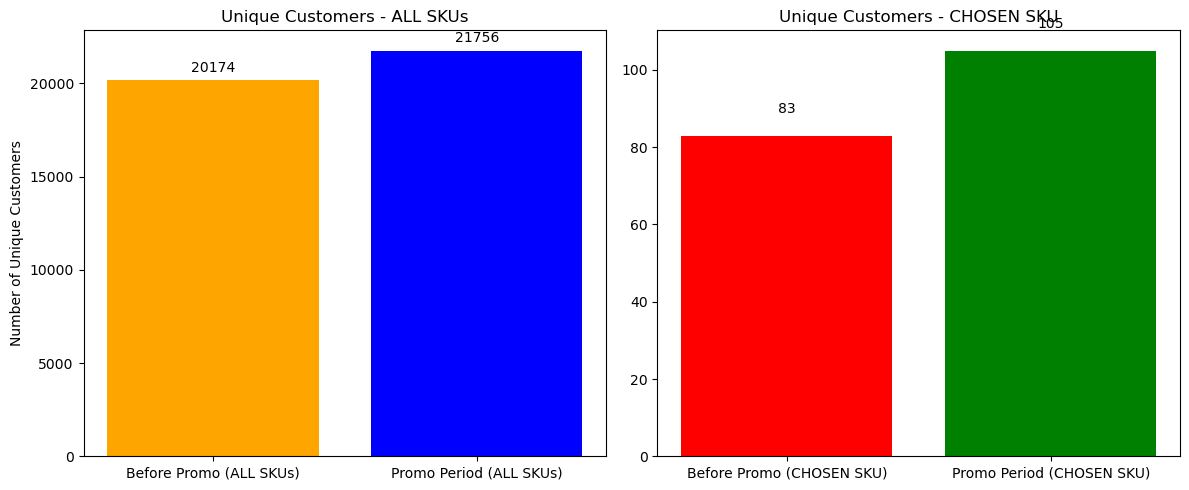

In [48]:
# Data for each plot
labels_all_skus = ["Before Promo (ALL SKUs)", "Promo Period (ALL SKUs)"]
values_all_skus = [20174, 21756]
colors_all_skus = ['orange', 'blue']

labels_chosen_sku = ["Before Promo (CHOSEN SKU)", "Promo Period (CHOSEN SKU)"]
values_chosen_sku = [83, 105]
colors_chosen_sku = ['red', 'green']

# Plot for ALL SKUs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
bars1 = plt.bar(labels_all_skus, values_all_skus, color=colors_all_skus)
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 300, int(yval), ha='center', va='bottom')
plt.title('Unique Customers - ALL SKUs')
plt.ylabel('Number of Unique Customers')

# Plot for CHOSEN SKU
plt.subplot(1, 2, 2)
bars2 = plt.bar(labels_chosen_sku, values_chosen_sku, color=colors_chosen_sku)
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center', va='bottom')
plt.title('Unique Customers - CHOSEN SKU')

plt.tight_layout()
plt.show()


#### Find "New Clients" (those who appeared only during promo, not before)

In [49]:
# Find new customers: present during promo but NOT before
new_clients = set(promo_period_all_clients) - set(before_promo_all_clients)

print(f"Number of New Clients Attracted by Promo: {len(new_clients)}")

# See a preview of the first few new clients
new_clients_list = list(new_clients)
print("Sample New Clients:", new_clients_list[:10])



Number of New Clients Attracted by Promo: 6718
Sample New Clients: ['111a02eb6f283931b25a3e0f4fe3beee', '7b415619acac060d5d9b499cc589bc04', '22501999be05899c03ec27b338d9694b', '9e1fc0848f41bf49608a01cef8140be7', '2d4fc0a15e2b2eebfdc02cd5f4b6b648', 'a51b53333ef4ce16d447f234d76d4ac4', '4eb73f28dae5a9958384c748c3e4ac17', '0bc469d87d610555e85561c859c49d71', '72e3227b8939d10aedc91f67c526c78d', '774eaf258143bc0faf76fe92c49f9a5c']


####  Recommend Products for New Clients

In [51]:
# Filter merged_data for purchases by new clients (after promo started)
purchases_new_clients = merged_data[
    (merged_data['client_id'].isin(new_clients)) &
    (merged_data['day'] >= promo_start)
]

# Top products bought by new clients
top_recommendations = purchases_new_clients['sku'].value_counts().head(10)
print("Top 10 Products Bought by New Clients:")
print(top_recommendations)


Top 10 Products Bought by New Clients:
sku
33306ccd877e73c388652739869d3dc7    43632
7a8675a8f6988ebcbefd062fabaccc85    39856
142d63107737a448dc2dfe2dcd0154b8    22643
ef7bf412117548cb80b3f3b33a12977d    19384
c8ac520562ba934dd67cbf0f060c4252    17413
b75147feae4cf8ec07fb5f2cef855def    17062
1accaece89aad30aeab8ee5a72a2ecf0    16328
485d1663d71b71333972a03adba86ac1    13288
6278f48a43fb0a23036b3a11c92e726c    11114
119a9ea3a832472e1c163e5c1afba59e     9840
Name: count, dtype: int64


/var/folders/rm/lmyjz_vx0k36zcr90nqkhgyr0000gn/T/ipykernel_18293/1833875875.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_recommendations_df, x='SKU', y='Purchases', palette='viridis')


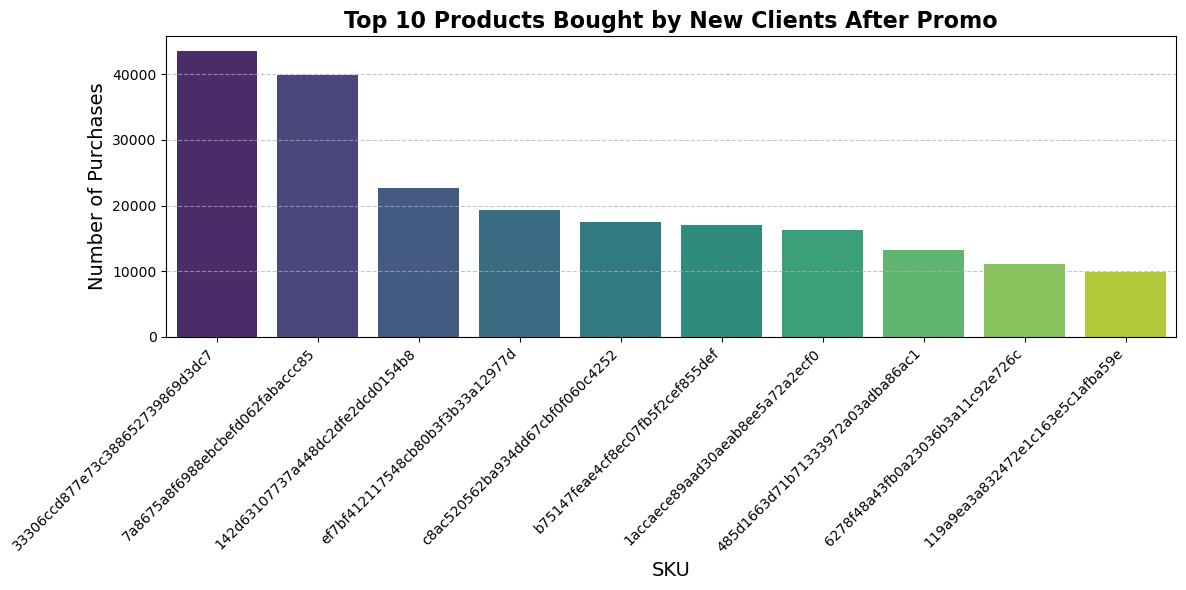

In [55]:
# Prepare the data again
top_recommendations_df = top_recommendations.reset_index()
top_recommendations_df.columns = ['SKU', 'Purchases']

# Seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_recommendations_df, x='SKU', y='Purchases', palette='viridis')

plt.title("Top 10 Products Bought by New Clients After Promo", fontsize=16, weight='bold')
plt.xlabel("SKU", fontsize=14)
plt.ylabel("Number of Purchases", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
